In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return (1/(1 + np.exp(-x)))

def sigmoidprime(x):
    return (sigmoid(x) * (1 - sigmoid(x)))

In [3]:
# These are the four possible input pairs of (x1,x2).
input = np.array([[0,0], [0,1], [1,0], [1,1]])

# These are possible labels form some logical gates.
t_and = np.array([0,0,0,1]) # and - label
t_or = np.array([0,1,1,1]) # or - label
t_nand = np.array([1,1,1,0]) # nand - label
t_nor = np.array([1,0,0,0]) # nor - label
t_xor = np.array([0,1,1,0]) # xor - label

In [4]:
class Perceptron:
    
    def __init__(self, input_units):
        self.input_units = input_units
        self.weights = np.random.randn(input_units)
        # bias is always 1 but we assign the weight of the bias here so to say
        self.bias = np.random.randn()
        self.alpha = 1
        
        # for later use, also store the variables drive and inputs
        self.drive = 0
        self.inputs = 0
        
    def forward_step(self, inputs):
        # Perform a perceptron forward step.
        self.inputs = inputs
        
        # 1. Calculate the drive. You can use @ as a matrix multiplication command.
        self.drive = self.weights @ inputs + self.bias
        
        # 2. Return the activation, feeding the drive into the sigmoid function
        return sigmoid(self.drive)
    
    def update(self, delta):
        # compute the gradients of the weights (and weight of the bias) and update these parameters
        self.weights = self.weights - (self.alpha * delta * self.inputs)
        # also update the weight of the bias
        self.bias = self.bias - (self.alpha * delta * 1)

In [5]:
class MLP:
    
    def __init__(self):
        # create list with 4 perceptrons for the hidden layer
        self.hidden_layer = [Perceptron(input_units=2) for _ in range(4)]
        
        # create Perceptron for output layer
        self.output_layer = Perceptron(input_units=4)
        
        # initialize final output of the MLP for later use
        self.output = 0
    
    def forward_step(self, inputs):
        # create a list for the outputs of the several perceptrons and
        # compute the output of each perceptron
        activation = [perceptron.forward_step(inputs) for perceptron in self.hidden_layer]
        
        # feed activation of hidden layer to output layer and save output of the whole MLP
        self.output = self.output_layer.forward_step(np.reshape(activation, newshape=(-1)))
    
    def backprop_step(self, label):
        # calculate error(delta) for the output neuron
        error_output = -(label - self.output) * sigmoidprime(self.output_layer.drive)
        
        # update weights and bias for the output layer
        self.output_layer.update(error_output)
        
        
        for i, perceptron in enumerate(self.hidden_layer):
            # calculate error for the hidden layer
            error_hidden = error_output * self.output_layer.weights[i] * sigmoidprime(perceptron.drive)
            
            # now update the parameters of the the hidden layer
            perceptron.update(error_hidden)

# Training

In [6]:
# store epochs, loss and accuracy
def train(label):
    epochs = []
    loss = []
    accuracy = []

    mlp = MLP()

    # start the epochs
    for e in range(1000):
        # epochs count
        epochs.append(e)

        # accuracy and loss with the current output and label of the MLP
        accuracy_currently = 0
        loss_currently = 0

        # looping over each data point in our data set once
        for i in range(len(input)):

            # perform the forward step
            mlp.forward_step(input[i])
            # perform backprop step
            mlp.backprop_step(label[i])

            accuracy_currently += int((mlp.output >= 0.5) == label[i])
            loss_currently += (label[i] - mlp.output)**2

        # average accuracy and loss
        accuracy.append(accuracy_currently/4)
        loss.append(loss_currently/4)
        
    return [epochs, loss, accuracy]

# Visualizations

In [7]:
def plot(epochs, loss, accuracy, title):

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
    fig.suptitle(title, fontsize=30)
    axes[0].plot(epochs, loss)
    axes[0].set_xlabel("Epochs")
    axes[0].set_ylabel("Loss")
    axes[0].set_title("Loss", fontsize=20)
    axes[1].plot(epochs, accuracy)
    axes[1].set_xlabel("Epochs")
    axes[1].set_ylabel("Accuracy")
    axes[1].set_title("Accuracy", fontsize=20)
    plt.show()

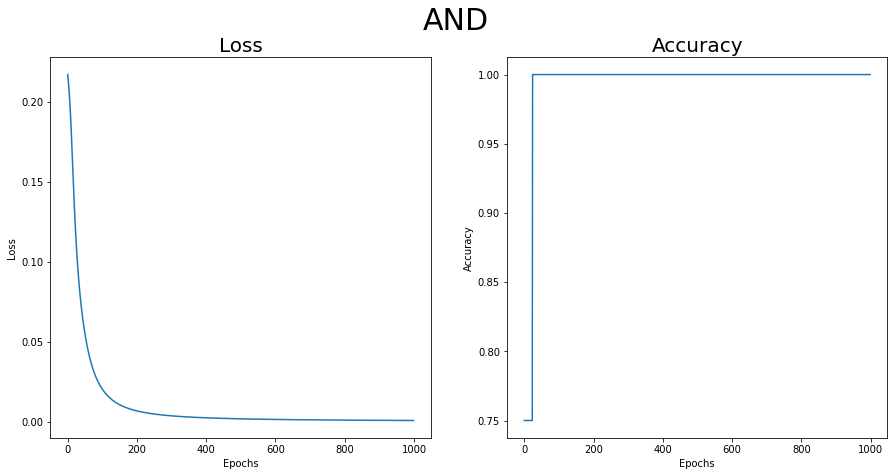

In [8]:
MLP_t_and = train(t_and)

plot(*MLP_t_and, "AND")

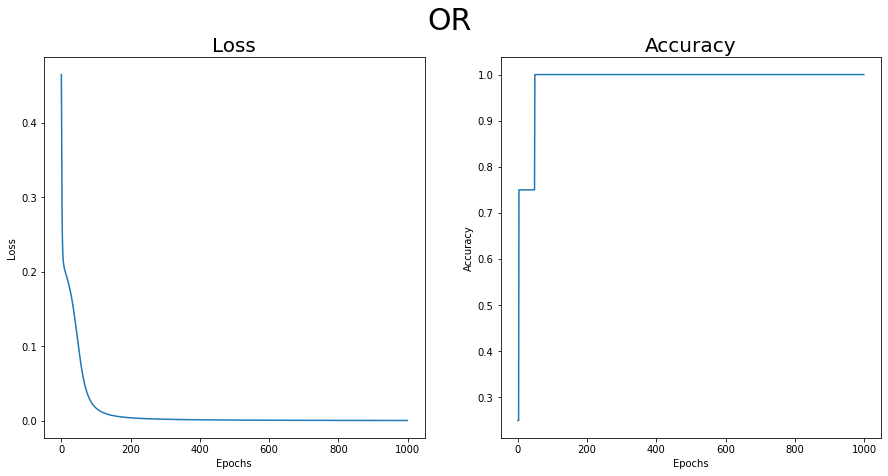

In [9]:
MLP_t_or = train(t_or)

plot(*MLP_t_or, "OR")

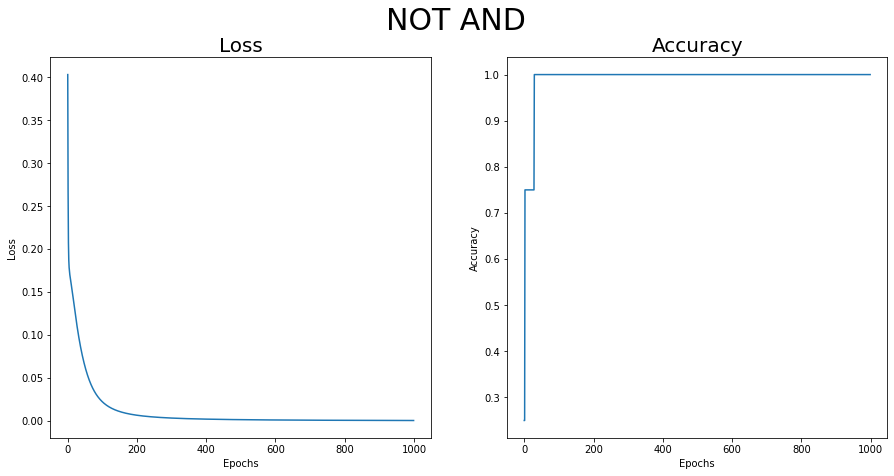

In [10]:
MLP_t_nand = train(t_nand)

plot(*MLP_t_nand, "NOT AND")

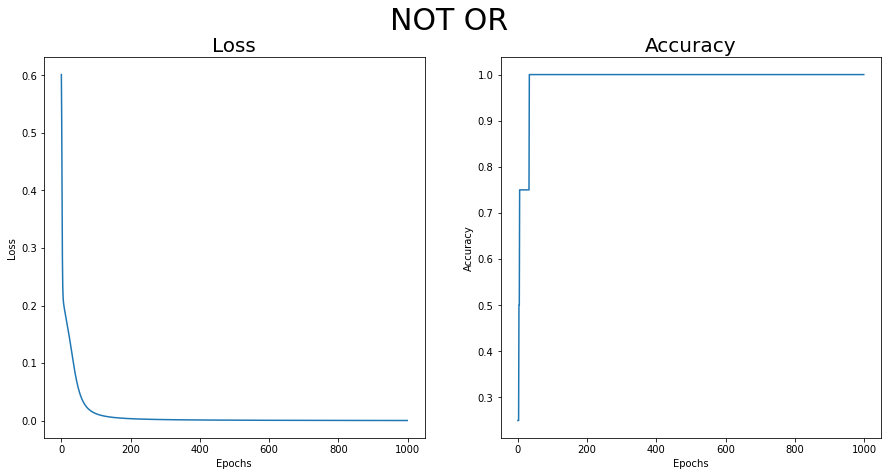

In [11]:
MLP_t_nor = train(t_nor)

plot(*MLP_t_nor, "NOT OR")

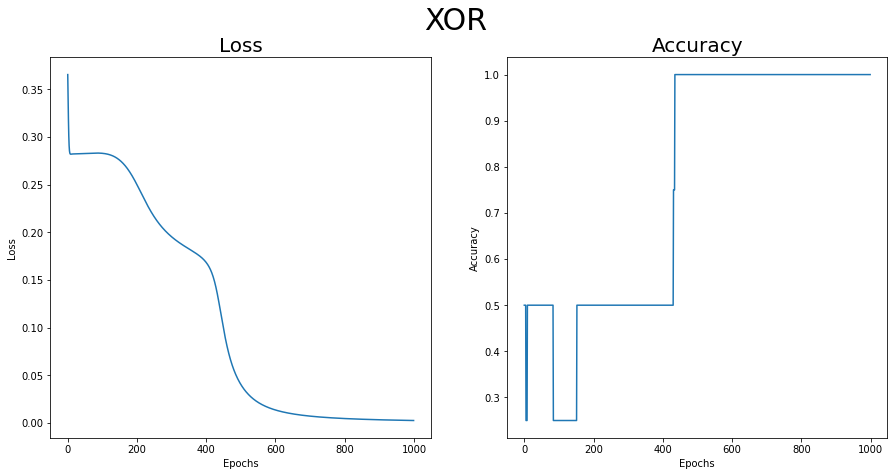

In [12]:
MLP_t_xor = train(t_xor)

plot(*MLP_t_xor, "XOR")